In [40]:
import numpy as np
import matplotlib.pyplot as plt

import h5py
import os 

## Analyse données Reynolds 34

In [11]:
DATA_DIR = "./Re34"

In [38]:
train_path = os.path.join(DATA_DIR,'train.h5')
with h5py.File(train_path, "r") as f:
    training_set = f["velocity_field"][()]
    simulation_time_train = f["time"][()][-1] + f["dt"][()] 
    dt = simulation_time_train/training_set.shape[0]
    n_dim = f["ndim"][()]
    nf = f["nf"][()]
    nk = f["nk"][()]
    re = f["re"][()]
    resolution = f["resolution"][()]

print(f"Simulation done at Re {re} and forcing term at frequence {nf}; resolution: {resolution}, simulation time: {simulation_time_train}, nk: {nk}, dt: {dt}, n_dim: {n_dim},")
print(f"Data shape: {training_set.shape}")

Simulation done at Re 34.0 and forcing term at frequence 4; resolution: 64, simulation time: 180.0, nk: 32, dt: 0.1, n_dim: 2,
Data shape: (1800, 64, 64, 2)


In [44]:
u = training_set[...,0]
v = training_set[...,1] 
E = 0.5 * (u**2 + v**2)

L = 2*np.pi/nk
vel_rms = np.sqrt(np.mean(u**2 + v**2))

tau_adv = L / vel_rms
print(f"L carac: {L}\nTau carac:{tau_adv}")

L carac: 0.19634954084936207
Tau carac:0.18186689023173505


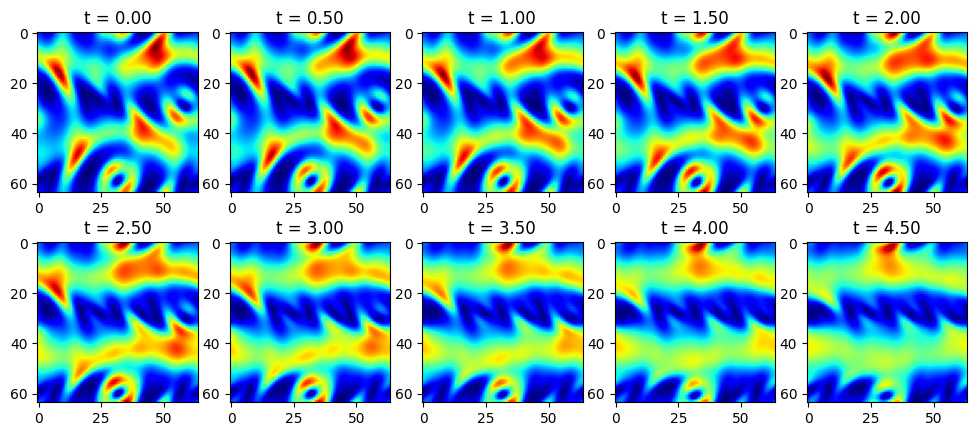

In [64]:
fig, ax = plt.subplots(2,5,figsize=(12,5))

for i in range(10):
    ax[i//5, i%5].imshow(E[5*i], cmap='jet')
    ax[i//5, i%5].set_title(f"t = {5*i*dt:.2f}")

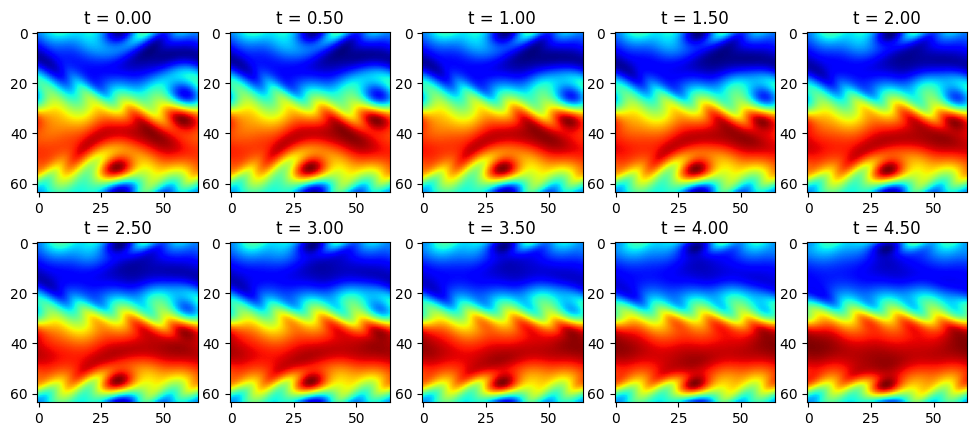

In [65]:
fig, ax = plt.subplots(2,5,figsize=(12,5))

for i in range(10):
    ax[i//5, i%5].imshow(v[5*i], cmap='jet')
    ax[i//5, i%5].set_title(f"t = {5*i*dt:.2f}")

In [66]:
a = 2

In [68]:
type(a)==int

True